In [1]:
import matplotlib.pyplot as plt
from spectral.io import envi
import numpy as np
import os
from osgeo import gdal



Download data:

Start by downloading :
https://popo.jpl.nasa.gov/avng/y23_bioscape/ang20231031t071727_001_L2A_OE_main_27577724_RFL_ORT.tar.gz  

and unpacking with:

tar -xzvf ang20231031t071727_001_L2A_OE_main_27577724_RFL_ORT.tar.gz  

In [38]:



ds = envi.open('ang20231031t071727_001_L2A_OE_main_27577724_RFL_ORT.hdr')
dat = ds.open_memmap(interleave='bip')
wl = np.array([float(x) for x in ds.metadata['wavelength']])




Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


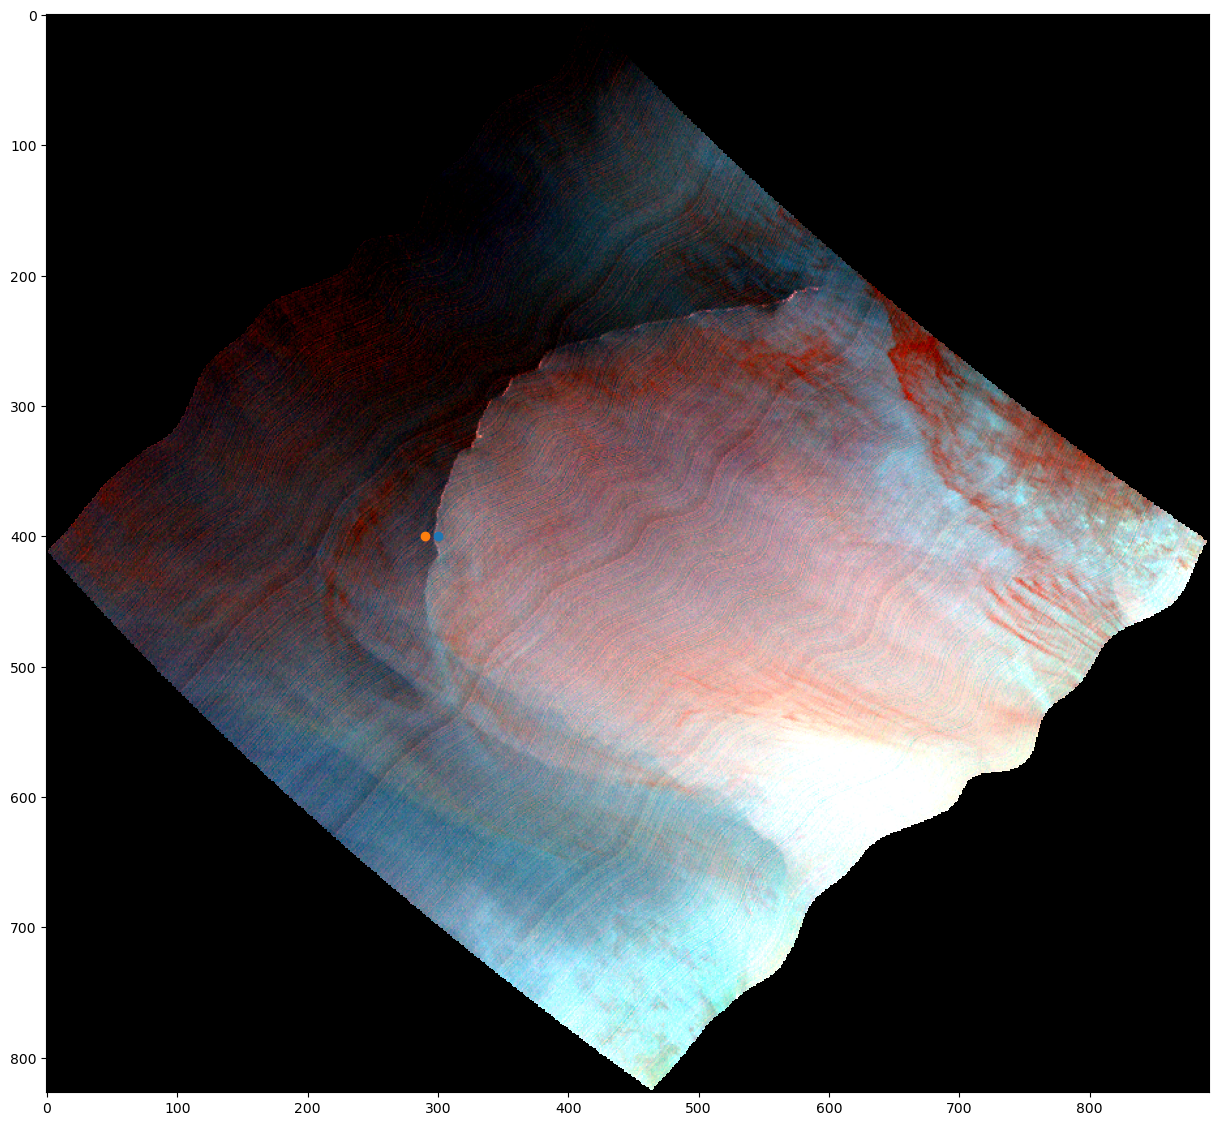

In [33]:
rgb = dat[...,np.array([60,40,30])].copy()
rgb[rgb == -9999] = np.nan
rgb -= np.nanpercentile(rgb,5,axis=(0,1))[np.newaxis,np.newaxis,:]
rgb /= np.nanpercentile(rgb,95,axis=(0,1))[np.newaxis,np.newaxis,:]
#rgb /= 0.05
plt.figure(figsize=(15,15))
plt.scatter([300],[400])
plt.scatter([300-10],[400])
plt.imshow(rgb)

Text(0.5, 0, 'Wavelength [nm]')

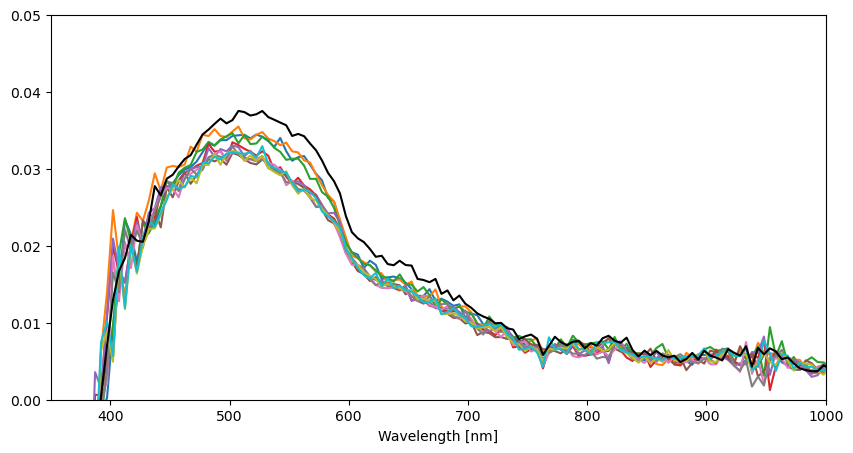

In [36]:
plt.figure(figsize=(10,5))
for x in range(10):
    plt.plot(wl,dat[400,300 - x,:])
plt.plot(wl,dat[400,600,:],c='black')
plt.ylim([0,0.05])
plt.xlim([350,1000])
plt.xlabel('Wavelength [nm]')